<a href="https://colab.research.google.com/github/vmagal1/basefinalebac/blob/main/Mod_07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [70]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/base_final (1).csv')
df.head(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
3,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False
4,0,27.482192,4.024658,1,0,1,0,2.0,False,False,...,True,True,False,False,False,True,False,False,False,False


In [63]:
# Armazenando as variaveis
x = df.drop('mau', axis=1)
y = df['mau']
clf = DecisionTreeClassifier(random_state=123)




In [64]:
#Criando a Base de teste e treino
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
clf = DecisionTreeClassifier(random_state=123)
clf.fit(x_train, y_train)


DecisionTreeClassifier(random_state=123)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

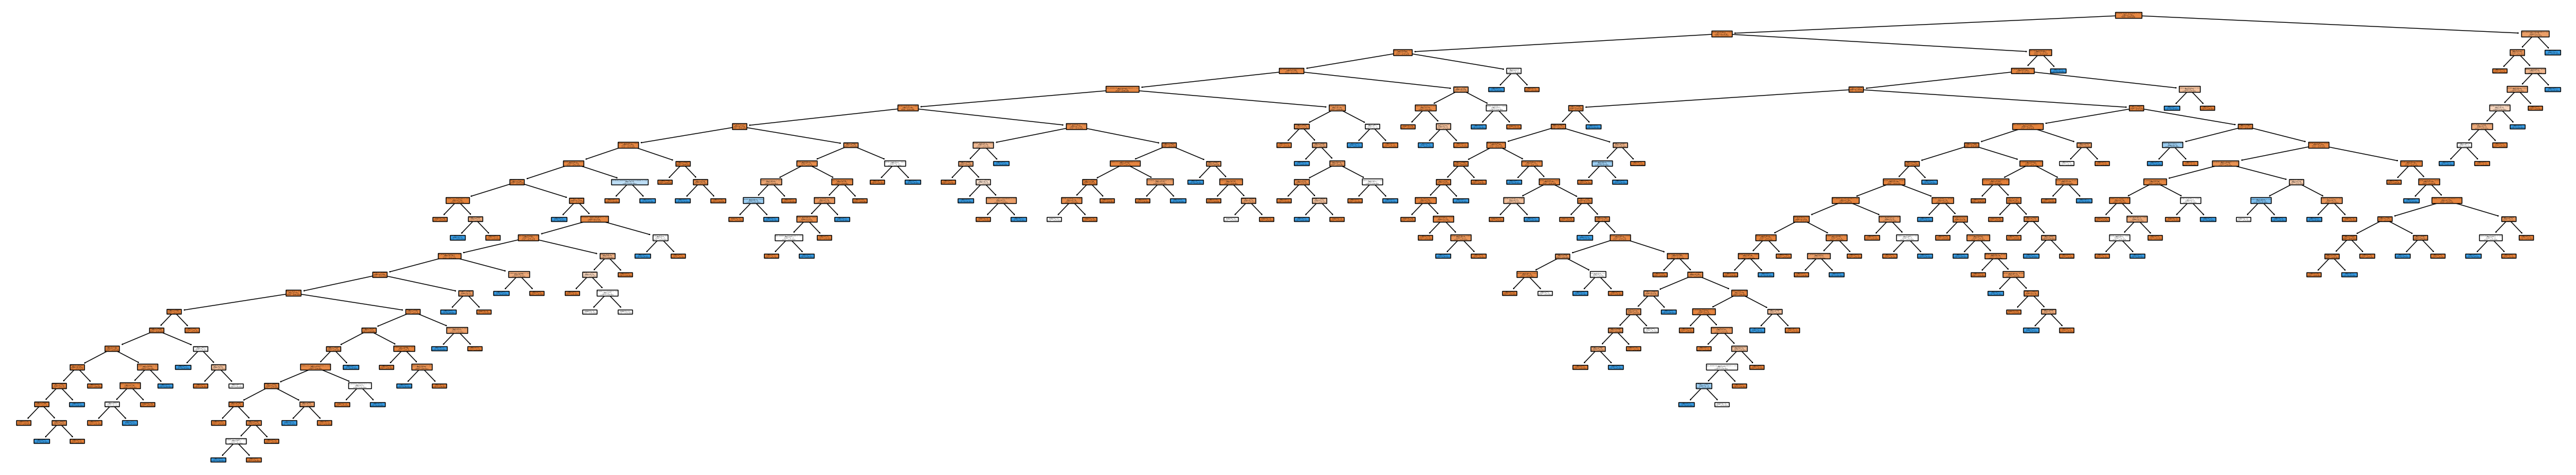

In [89]:
#Plotando a arvore de decisao
plt.figure(figsize=(55, 10))
plot_tree(clf,
          filled=True,
          class_names= ['Aprovados', 'Reprovados'],
          feature_names = x.columns);

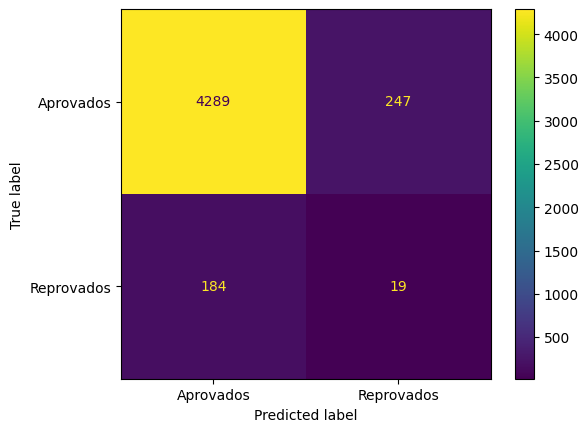

In [91]:
#Treinando o modelo

ychapeutrain = clf.predict(x_train)
cm = confusion_matrix(y_train, ychapeutrain, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()



In [92]:
# Acuracia do modelo de treino 90%
accuracy_score(y_train, ychapeutrain)


0.9090525427305338

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

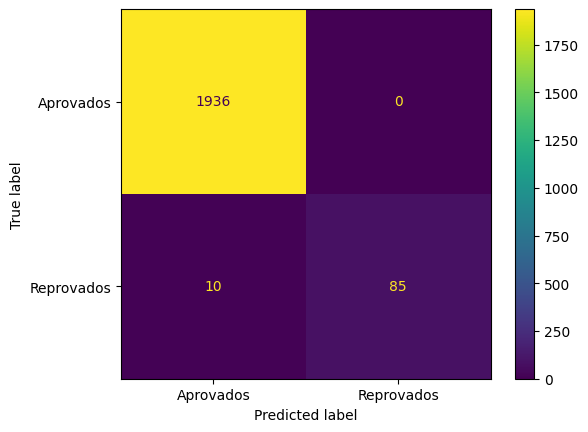

In [94]:
# Classificando a base de testes
ychapeu_test = clf.predict(x_test)
cm = confusion_matrix(y_test, ychapeu_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [97]:
# Calculando a acuracia (99%)
accuracy_score(y_test, ychapeu_test)

0.9950763170851797

In [105]:
# Calculando a proporcao de maus
proporcao_maus = cm[1, :].sum() / cm.sum()
proporcao_maus

0.04677498769079271

In [99]:
#Podando a Arvore de decisoes
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=121)
clf2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=121)

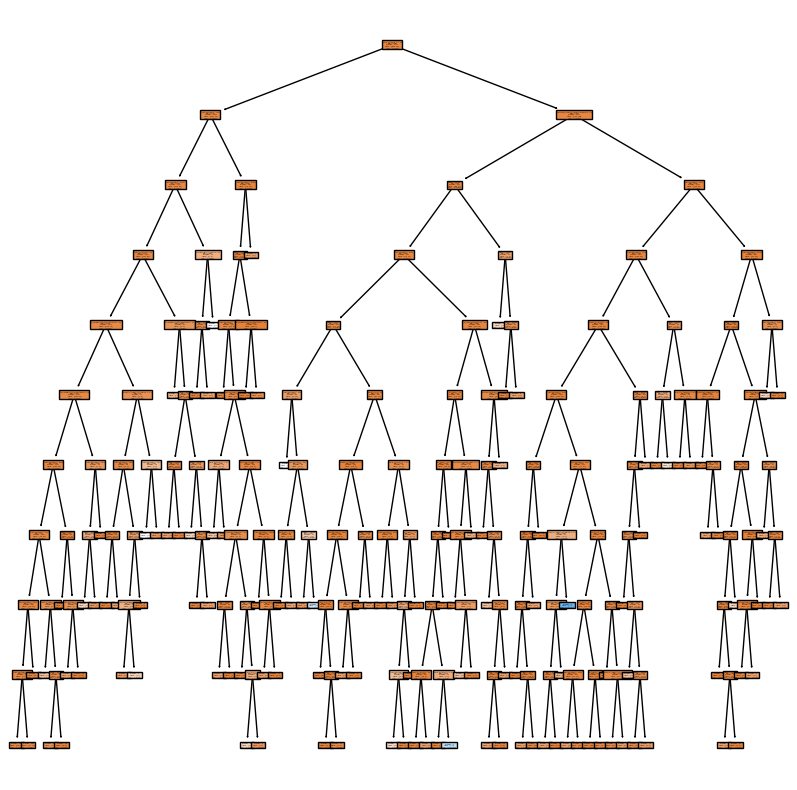

In [109]:
#Plotando a arvore podada
plt.figure(figsize=(10, 10))
plot_tree(clf2,
          filled=True,
          class_names= ['Aprovados', 'Reprovados'],
          feature_names = x.columns);

In [114]:
c

AttributeError: 'DecisionTreeClassifier' object has no attribute 'head'